In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from functools import reduce
from cobra.io import read_sbml_model, load_json_model, load_matlab_model
from google_sheet import GoogleSheet

## Comparison of Metabolic Reconstructions

In [2]:
# Generate models for comparison
icho1766 = read_sbml_model('../Data/reconciliation/models/iCHOv1_final.xml')
icho2291 = read_sbml_model('../Data/Reconciliation/models/iCHO2291.xml')
icho2101 = load_json_model('../Data/Reconciliation/models/iCHO2101.json')
recon3d = load_matlab_model('../Data/Reconciliation/models/Recon3D_301.mat')
iCHO3000 = load_json_model('iCHOv3_CHO_03042024.json')

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-04


No defined compartments in model Recon3D. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x


FileNotFoundError: [Errno 2] No such file or directory: 'iCHOv3_CHO_03042024.json'

In [25]:
##### ----- Generate datasets from Google Sheet ----- #####
#Credential file
KEY_FILE_PATH = 'credentials.json'
#CHO Network Reconstruction + Recon3D_v3 Google Sheet ID
SPREADSHEET_ID = '1MlBXeHIKw8k8fZyXm-sN__AHTRSunJxar_-bqvukZws'
# Initialize the GoogleSheet object
sheet = GoogleSheet(SPREADSHEET_ID, KEY_FILE_PATH)
# Read data from the Google Sheet
sheet_rxns = 'Rxns'
rxns = sheet.read_google_sheet(sheet_rxns)

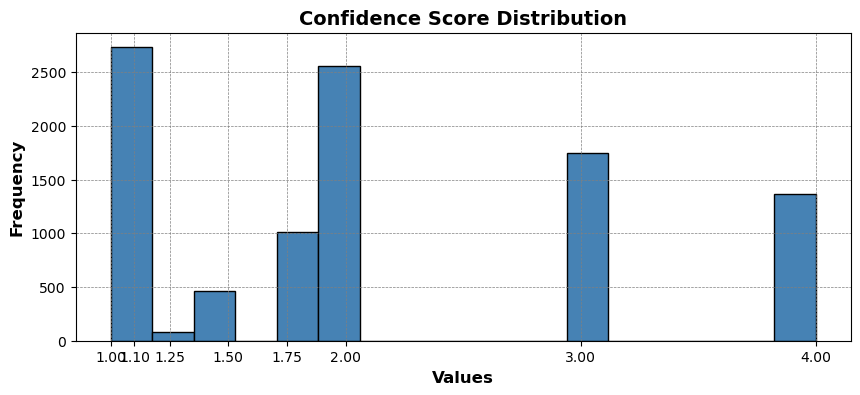

In [26]:
#### --- Conf. Score distribution throughout the dataset --- ####
data_numeric = pd.to_numeric(rxns['Conf. Score'], errors='coerce')
data_numeric = data_numeric.dropna()

# Plotting the histogram
plt.figure(figsize=(10, 4))
plt.hist(data_numeric, bins='auto', color='steelblue', edgecolor='black')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xticks(data_numeric.unique())
plt.xlabel('Values', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Confidence Score Distribution', fontsize=14, fontweight='bold')

plt.savefig('../Plots/conf_score_distribution.png', dpi=300)
plt.show()

In [ ]:
#### --- Calculate the amount of reactions per Subsystem ---- ####

#iCHO 1766
subs = []
for reaction in icho1766.reactions:
    subs.append(reaction.subsystem.upper())
    
icho1766_subs = Counter(subs)

#iCHO 2291
subs = []
for reaction in icho2291.reactions:
    subs.append(reaction.subsystem.upper())
    
icho2291_subs = Counter(subs)

# iCHO 2101
subs = []
for reaction in icho2101.reactions:
    subs.append(reaction.subsystem.upper())
    
icho2101_subs = Counter(subs)

# Recon3D
subs = []
for reaction in recon3d.reactions:
    subs.append(reaction.subsystem.upper())
    
recon3d_subs = Counter(subs)

#iCHO 3000
subs = []
for reaction in iCHO3000.reactions:
    subs.append(reaction.subsystem.upper())
    
iCHO3000_subs = Counter(subs)

In [ ]:
# Mapping of subsystems to categories
category_mapping = {
    'Amino Acid Metabolism and Derivatives': [
        'ARGININE AND PROLINE METABOLISM', 'METHIONINE METABOLISM', 'AMINO ACID DERIVATIVE', 
        'GLYCINE, SERINE, AND THREONINE METABOLISM', 'HISTIDINE METABOLISM', 'LYSINE METABOLISM', 
        'METHIONINE AND CYSTEINE METABOLISM', 'TYROSINE METABOLISM', 'VALINE, LEUCINE, AND ISOLEUCINE METABOLISM',
        'ALANINE AND ASPARTATE METABOLISM', 'AMINOSUGAR METABOLISM', 'SELENOAMINO ACID METABOLISM',
        'GLYCINE, SERINE, ALANINE, AND THREONINE METABOLISM'
    ],
    'Carbohydrate and Energy Metabolism': [
        'GLYCOLYSIS/GLUCONEOGENESIS', 'FRUCTOSE AND MANNOSE METABOLISM', 'CENTRAL CARBON AND ENERGY METABOLISM',
        'GALACTOSE METABOLISM', 'PENTOSE AND GLUCURONATE INTERCONVERSIONS', 'STARCH AND SUCROSE METABOLISM',
        'PENTOSE PHOSPHATE PATHWAY', 'PYRUVATE METABOLISM'
    ],
    'Lipid and Fatty Acid Metabolism': [
        'FATTY ACID ELONGATION', 'FATTY ACID METABOLISM', 'CHOLESTEROL METABOLISM', 'EICOSANOID METABOLISM',
        'ARACHIDONIC ACID METABOLISM', 'BILE ACID SYNTHESIS', 'FATTY ACID SYNTHESIS', 'GLYCEROLIPID METABOLISM',
        'SPHINGOLIPID METABOLISM', 'SQUALENE AND CHOLESTEROL SYNTHESIS', 'STEROID METABOLISM', 'TRIACYLGLYCEROL SYNTHESIS',
        'VITAMIN A METABOLISM', 'VITAMIN D METABOLISM', 'LINOLEATE METABOLISM', 'FATTY ACID OXIDATION'
    ],
    'Nucleotide and Nucleic Acid Metabolism': [
        'PURINE CATABOLISM', 'PYRIMIDINE BIOSYNTHESIS', 'NUCLEOTIDE SALVAGE PATHWAY', 'NUCLEOTIDES',
        'NUCLEOTIDE INTERCONVERSION', 'PURINE SYNTHESIS', 'PYRIMIDINE SYNTHESIS', 'PYRIMIDINE CATABOLISM',
        'NUCLEOTIDE SUGAR METABOLISM'
    ],
    'Vitamin and Cofactor Metabolism': [
        'VITAMIN B12 METABOLISM', 'VITAMIN C METABOLISM', 'VITAMIN D', 'VITAMIN A METABOLISM',
        'VITAMIN E METABOLISM', 'VITAMIN B2 METABOLISM', 'VITAMIN B6 METABOLISM', 'FOLATE METABOLISM',
        'BIOTIN METABOLISM', 'THIAMINE METABOLISM', 'TETRAHYDROBIOPTERIN METABOLISM', 'VITAMIN K METABOLISM',
        'VITAMIN AND COFACTOR METABOLISM'
    ],
    'Glycan, Glycosaminoglycan, and Glycolipid Metabolism': [
        'N-GLYCAN BIOSYNTHESIS', 'GLYCOSPHINGOLIPID METABOLISM', 'CHONDROITIN SYNTHESIS', 'KERATAN SULFATE DEGRADATION',
        'HEPARAN SULFATE DEGRADATION', 'HYALURONAN METABOLISM', 'N-GLYCAN DEGRADATION', 'O-GLYCAN SYNTHESIS',
        'GLYCOSPHINGOLIPID METABOLISM', 'KERATAN SULFATE SYNTHESIS', 'N-GLYCAN SYNTHESIS', 'N-GLYCAN METABOLISM',
        'O-GLYCAN METABOLISM'
    ],
    'Protein and Peptide Metabolism': [
        'PROTEIN PRODUCTION', 'PROTEIN ASSEMBLY', 'PROTEIN DEGRADATION', 'PROTEIN MODIFICATION',
        'PEPTIDE METABOLISM', 'UBIQUINONE SYNTHESIS', 'HEME SYNTHESIS', 'PROTEIN PRODUCTION'
    ],
    'Xenobiotic and Drug Metabolism': [
        'CYP METABOLISM', 'CYTOCHROME METABOLISM', 'XENOBIOTICS METABOLISM', 'ROS DETOXIFICATION',
        'DRUG METABOLISM', 'ALKALOID SYNTHESIS'
    ],
    'Miscellaneous and Complex Pathways': [
        'BIOMASS SYNTHESIS', 'R GROUP SYNTHESIS', 'MISCELLANEOUS', 'BIOMASS AND MAINTENANCE FUNCTIONS',
        'UNASSIGNED', 'OTHER CARBON METABOLISM'
    ]
}

In [ ]:
# Convert Counters to DataFrames
df_icho1766 = pd.DataFrame.from_dict(icho1766_subs, orient='index', columns=['iCHO1766'])
df_icho2291 = pd.DataFrame.from_dict(icho2291_subs, orient='index', columns=['iCHO2291'])
df_icho2101 = pd.DataFrame.from_dict(icho2101_subs, orient='index', columns=['iCHO2101'])
df_recon3d = pd.DataFrame.from_dict(recon3d_subs, orient='index', columns=['Recon3D'])
df_iCHO3000 = pd.DataFrame.from_dict(iCHO3000_subs, orient='index', columns=['iCHO3000'])

# Combine the DataFrames
combined_df = pd.concat([df_icho1766, df_icho2101, df_icho2291, df_recon3d, df_iCHO3000], axis=1).fillna(0)

# Create a mask where each row is True if all its values are non-zero
#non_zero_mask = (combined_df != 0).all(axis=1)

# Apply the mask to filter out rows with any zero values
#filtered_df = combined_df[non_zero_mask]

# Create a mask where each row is True if the index does not start with "Transport"
mask = ~combined_df.index.str.startswith('TRANSPORT') & ~combined_df.index.str.startswith("EXCHANGE") & ~combined_df.index.str.startswith("SINK") & ~combined_df.index.str.startswith("DEMAND") & ~combined_df.index.str.startswith("INTRACELLULAR") & ~combined_df.index.str.startswith("EXTRACELLULAR")


# Apply the mask to the DataFrame to keep only rows that do not start with "Transport"
filtered_df = combined_df[mask]

# Plot 
ax = filtered_df.plot(kind='barh', figsize=(20, 25), width=1.8) 

# Title and labels
plt.title('Subsystem Reaction Counts Across Different CHO Recons', fontsize=28)
plt.ylabel('Subsystem', fontsize=26)  # This was previously 'xlabel'
plt.xlabel('Reaction Count', fontsize=26)  # This was previously 'ylabel'

# Adjust the layout
plt.tight_layout()  

# Customize legend
plt.legend(fontsize=24)

# Save the plot to a file
plt.savefig('../Plots/subsystem_reaction_counts.png', dpi=300)  
# Show the plot
plt.show()

In [ ]:
#Reaction counts for each recon
icho1766_rxns = len(icho1766.reactions)
icho2291_rxns = len(icho2291.reactions)
icho2101_rxns = len(icho2101.reactions)
recon3d_rxns = len(recon3d.reactions)
icho3000_rxns = len(iCHO3000.reactions)

#Metabolite counts for each recon
icho1766_mets = len(icho1766.metabolites)
icho2291_mets = len(icho2291.metabolites)
icho2101_mets = len(icho2101.metabolites)
recon3d_mets = len(recon3d.metabolites)
icho3000_mets = len(iCHO3000.metabolites)

# Gene counts for each recon
icho1766_gens = len(icho1766.genes)
icho2291_gens = len(icho2291.genes)
icho2101_gens = len(icho2101.genes)
recon3d_gens = len(recon3d.genes)
icho3000_gens = len(iCHO3000.genes)

# Subsystem count for each recon
icho1766_subs_count = len(icho1766_subs)
icho2291_subs_count = len(icho2291_subs)
icho2101_subs_count = len(icho2101_subs)
recon3d_subs_count = len(recon3d_subs)
icho3000_subs_count = len(iCHO3000_subs)


# Creating a DataFrame from the counts
data = {
    'iCHO1766': [icho1766_rxns, icho1766_mets, icho1766_gens, icho1766_subs_count],
    'iCHO2101': [icho2101_rxns, icho2101_mets, icho2101_gens, icho2101_subs_count],
    'iCHO2291': [icho2291_rxns, icho2291_mets, icho2291_gens, icho2291_subs_count],
    'iCHO3000': [icho3000_rxns, icho3000_mets, icho3000_gens, icho3000_subs_count],
    'Recon3D': [recon3d_rxns, recon3d_mets, recon3d_gens, recon3d_subs_count]
}

counts_df = pd.DataFrame(data, index=['Reactions', 'Metabolites', 'Genes', 'Subsystems'])

# Defining colors for the bars
colors = ['blue', 'orange', 'green', 'red','purple']

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 11))

# A function to annotate the bars with their values in bold and matching color
def annotate_bars(ax, colors):
    for i, p in enumerate(ax.patches):  # Loop over every bar, with index for color
        ax.annotate(f'{p.get_height()}',  # Get the height of the bar (the data value)
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Position for the text
                    ha='center',  # Center align
                    va='center',  # Center align vertically
                    xytext=(0, 9),  # 9 points vertical offset
                    textcoords='offset points',
                    fontweight='bold',  # Make text bold
                    color=colors[i % len(colors)])  # Match text color to the bar color

# Plotting and annotating each category with bold labels and matching colors
counts_df.loc['Reactions'].plot(kind='bar', ax=axes[0,0], title='Reactions', color=colors)
annotate_bars(axes[0,0], colors)

counts_df.loc['Metabolites'].plot(kind='bar', ax=axes[0,1], title='Metabolites', color=colors)
annotate_bars(axes[0,1], colors)

counts_df.loc['Genes'].plot(kind='bar', ax=axes[1,0], title='Genes', color=colors)
annotate_bars(axes[1,0], colors)

counts_df.loc['Subsystems'].plot(kind='bar', ax=axes[1,1], title='Subsystems', color=colors)
annotate_bars(axes[1,1], colors)

# Adjusting layout and rotating x-axis labels for all subplots uniformly
for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../Plots/general_metrics.png', dpi=300)  
plt.show()

In [ ]:
import re
list1 = [re.sub(r'\[.*?\]', '', m.id) for m in recon3d.metabolites]
set1 = set(list1)
print(len(list1))
print(len(set1))
print('----------------------------------------')
list2 = [m.id[:-2] for m in icho1766.metabolites]
set2 = set(list2)
print(len(list2))
print(len(set2))
print('----------------------------------------')
list3 = [m.id[:-2] for m in icho2101.metabolites]
set3 = set(list3)
print(len(list3))
print(len(set3))
print('----------------------------------------')
list4 = [m.id[:-2] for m in icho2291.metabolites]
set4 = set(list4)
print(len(list4))
print(len(set4))
print('----------------------------------------')
list5 = [m.id[:-2] for m in iCHO3000.metabolites]
set5 = set(list5)
print(len(list5))
print(len(set5))

In [ ]:
icho3000_subs_count

In [ ]:
# Initialize a dictionary to store the counts
counts = {
    'Model': [],
    'Reactions with GPR': [],
    'Reactions without GPR': [],
    'Total Reactions': []
}

# Loop through the models and calculate counts
models = [icho1766, icho2291, icho2101, iCHO3000, recon3d]
model_names = ['iCHO1766', 'iCHO2291', 'iCHO2101', 'iCHO3000', 'Recon3D']

for model, name in zip(models, model_names):
    rxn_with_gpr = sum(1 for rxn in model.reactions if str(rxn.gpr) not in ['', 'nan'])
    rxn_without_gpr = sum(1 for rxn in model.reactions if str(rxn.gpr) in ['', 'nan'])
    total = len(model.reactions)

    counts['Model'].append(name)
    counts['Reactions with GPR'].append(rxn_with_gpr)
    counts['Reactions without GPR'].append(rxn_without_gpr)
    counts['Total Reactions'].append(total)

# Convert the dictionary to a DataFrame
counts_df = pd.DataFrame(counts)
counts_df['%'] = (counts_df['Reactions with GPR']/counts_df['Total Reactions'])*100

# Setting the index to the model names
counts_df.set_index('Model', inplace=True)

# Plotting stacked bar chart
ax = counts_df[['Reactions with GPR','Reactions without GPR']].plot(kind='bar', stacked=True, figsize=(8, 6))

# Adding titles and labels
plt.title('GPR Coverage in each Recon')
plt.ylabel('Reaction Count')

ax.tick_params(axis='x', rotation=45)

plt.savefig('../Plots/gpr_coverage.png', dpi=300)  

plt.show()

## Comparison of Secretory Pathway Recons

In [16]:
path = '../Data/Sec_Recon_shared_genes/'

with open(path+'common_jahirs_metrecon.txt', 'r') as file: common_jahirs_metrecon = [line.strip() for line in file]
with open(path+'common_secrecon_jahirs.txt', 'r') as file: common_secrecon_jahirs = [line.strip() for line in file]
with open(path+'common_secrecon_metrecon.txt', 'r') as file: common_secrecon_metrecon = [line.strip() for line in file]
with open(path+'unique_secrecon_metrecon.txt', 'r') as file: unique_secrecon_metrecon = [line.strip() for line in file]

In [18]:
# Subsystems of genes shared between Sec Recon and Met Recon (iCHO3000) minus Jahir's

rxns_secrecon_metrecon = []
subs_secrecon_metrecon = []
for g in iCHO3000.genes:
    if str(g) in unique_secrecon_metrecon:
        for rxn in g.reactions:
            if rxn.id not in rxns_secrecon_metrecon:
                rxns_secrecon_metrecon.append(rxn.id)
                subs_secrecon_metrecon.append(rxn.subsystem)


# Subsystems of genes shared between Jahir's Recon and Met Recon (iCHO3000)

rxns_jahirs_metrecon = []
subs_jahirs_metrecon = []
for g in iCHO3000.genes:
    if str(g) in common_jahirs_metrecon:
        for rxn in g.reactions:
            if rxn.id not in rxns_jahirs_metrecon:
                rxns_jahirs_metrecon.append(rxn.id)
                subs_jahirs_metrecon.append(rxn.subsystem)

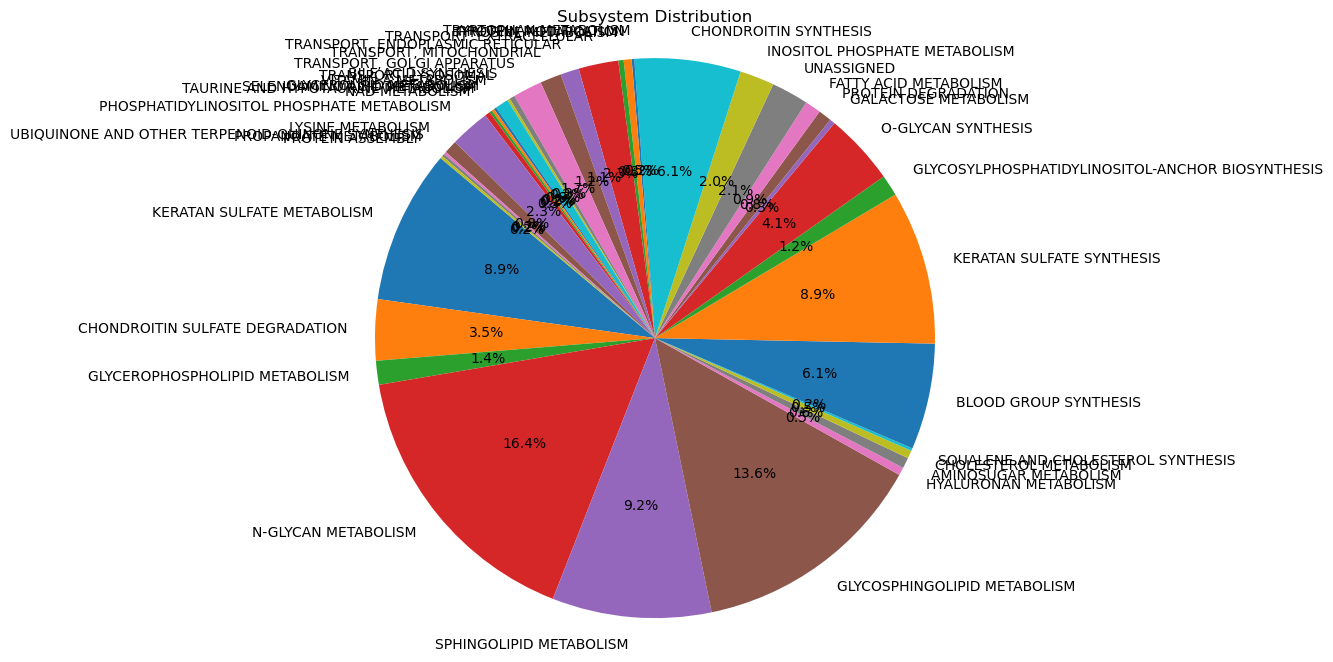

In [22]:
# Pie Chart Subsystems of genes shared between Sec Recon and Met Recon (iCHO3000) minus Jahir's

subsystem_counts = Counter(subs_secrecon_metrecon)
labels = list(subsystem_counts.keys())
sizes = list(subsystem_counts.values())

# Plot the pie chart
plt.figure(figsize=(10, 8)) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Subsystem Distribution')
plt.savefig('../Plots/pie_chart_subsystems_of_genes_shared_with_secrecon.png', dpi=300, bbox_inches='tight')
plt.show()

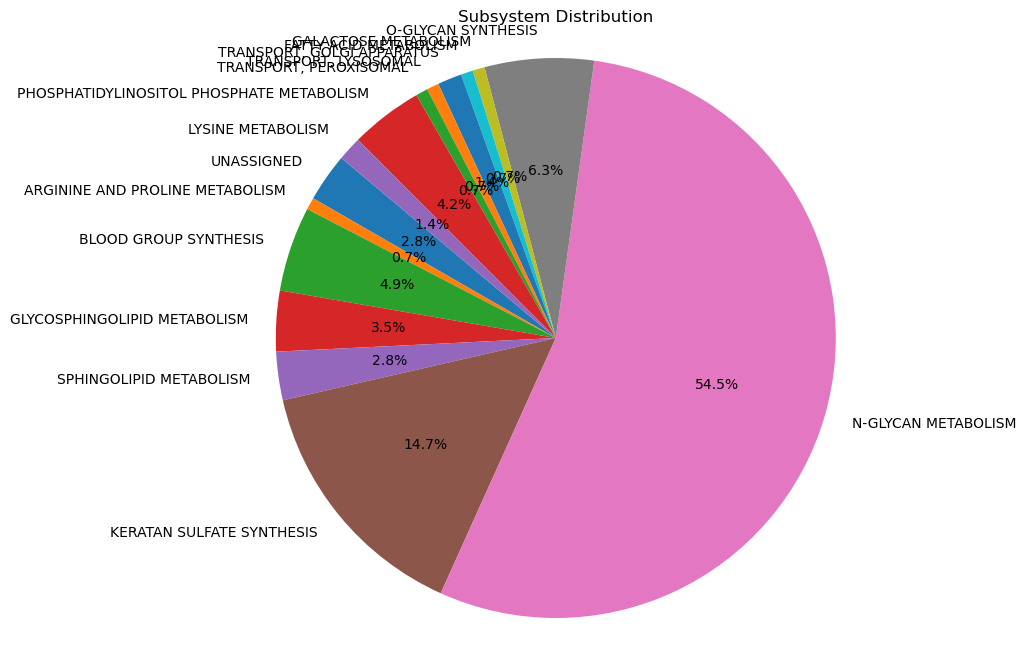

In [21]:
# Pie Chart of subsystems of genes shared between Jahir's Recon and Met Recon (iCHO3000)

subsystem_counts = Counter(subs_jahirs_metrecon)
labels = list(subsystem_counts.keys())
sizes = list(subsystem_counts.values())

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Subsystem Distribution')
plt.savefig('../Plots/pie_chart_subsystems_of_genes_shared_with_jahirs.png', dpi=300, bbox_inches='tight')
plt.show()

In [33]:
# Count how many reactions from the rxns_secrecon_metrecon come from Recon3D

c=0
for i, row in rxns.iterrows():
    if (row['iCHO1766']=='-') and (row['iCH02101']=='-') and (row['iCHO2291']=='-'): #Check if the reactions has been added from Recon3D or other databases
        r = str(row['Reaction'])
        if r in rxns_secrecon_metrecon:
            c+=1
print(len(rxns_secrecon_metrecon))
print(c)

653
170
